In [ ]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import matplotlib.pyplot as plt

URL_TEMPLATE = "https://yupest.github.io/nti/НТИ-2021/index_v2.html"
r = requests.get(URL_TEMPLATE)

soup = bs(r.text, "html.parser")

parsed = {
  'Имя': [name.string for name in soup.find_all('span', class_='name')],
  'Дни': [int(time.string.split(' дней')[0]) for time in soup.find_all('span', class_='Time')],
  'Сложность': [level.string for level in soup.find_all('span', class_='Level')],
  'Длина (км)': [float(length.string.split(' км')[0].replace(',', '.')) for length in soup.find_all('span', class_='length')],
  'Цена': [int(''.join(price.string.split(' '))) for price in soup.find_all('span', class_='Price')],
}

,Имя,Дни,Сложность,Длина (км),Цена
0,КРУГОБАЙКАЛЬСКАЯ ЖЕЛЕЗНАЯ ДОРОГА,8,Низкая,75.0,14700
1,ОСТРОВ ОЛЬХОН,8,Низкая,62.0,19600
2,ПИК ЧЕРСКОГО - КБЖД,10,Средняя,44.5,14700
3,ШУМАК,11,Высокая,50.0,18700
4,ДОЛИНА ВУЛКАНОВ,14,Средняя,500.0,39000
5,"ДЖИП ТУР ""В ДОЛИНУ ПОТУХШИХ ВУЛКАНОВ",14,Средняя,500.0,54800
6,"ТУР НА БАЙДАРКАХ ""ОБРАТНАЯ СТОРОНА КБЖД""",8,Низкая,77.0,16200
7,"""ПО ЛЬДУ БАЙКАЛА""",10,Средняя,101.0,14300
8,"""ВОКРУГ ОЛЬХОНА""",11,Средняя,85.0,17600
9,ВОСХОЖДЕНИЕ НА МУНКУ-САРДЫК,8,Средняя,26.0,13000


#Графики

Я пытатся вывести внизу названия туров, но они лезут друг на друга, и я не нашёл, как это исправить.

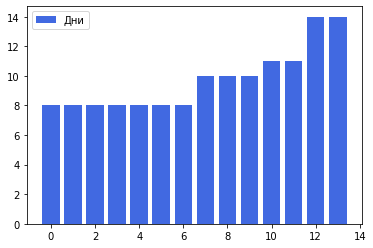

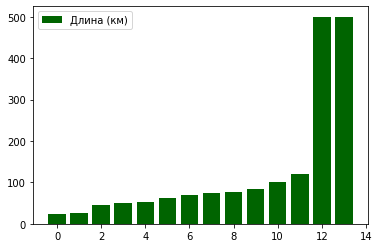

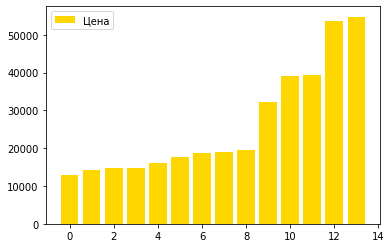

In [ ]:
charts = ['Дни', 'Длина (км)', 'Цена']
colors = ['royalblue', 'darkgreen', 'gold']
length = list(range(len(parsed['Имя'])))

for i in range(len(charts)):
  x = length
  y = sorted(parsed[charts[i]]) #я не думаю, что сортировка в такой диаграмме уместна, потому что номера туров (снизу) всегда идут по возрастанию

  plt.bar(x, y, label=charts[i], color=colors[i])
  plt.title = charts[i]
  plt.legend()
  plt.plot()

  plt.show()

#Таблица

In [ ]:
pd.DataFrame({key: pd.Series(parsed[key]) for key in parsed})

,Имя,Дни,Сложность,Длина (км),Цена
0,КРУГОБАЙКАЛЬСКАЯ ЖЕЛЕЗНАЯ ДОРОГА,8,Низкая,75.0,14700
1,ОСТРОВ ОЛЬХОН,8,Низкая,62.0,19600
2,ПИК ЧЕРСКОГО - КБЖД,10,Средняя,44.5,14700
3,ШУМАК,11,Высокая,50.0,18700
4,ДОЛИНА ВУЛКАНОВ,14,Средняя,500.0,39000
5,"ДЖИП ТУР ""В ДОЛИНУ ПОТУХШИХ ВУЛКАНОВ",14,Средняя,500.0,54800
6,"ТУР НА БАЙДАРКАХ ""ОБРАТНАЯ СТОРОНА КБЖД""",8,Низкая,77.0,16200
7,"""ПО ЛЬДУ БАЙКАЛА""",10,Средняя,101.0,14300
8,"""ВОКРУГ ОЛЬХОНА""",11,Средняя,85.0,17600
9,ВОСХОЖДЕНИЕ НА МУНКУ-САРДЫК,8,Средняя,26.0,13000
